In [7]:
%matplotlib inline

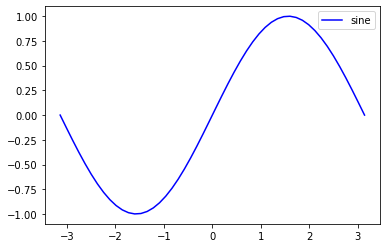

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)
plt.plot(x, y, 'b', label='sine')
plt.legend(loc='best')
plt.show()

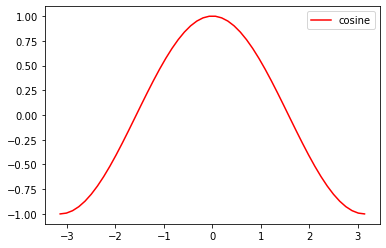

In [9]:
y2 = np.cos(x)
plt.plot(x, y2, 'r', label='cosine')
plt.legend(loc='best')
plt.show()

In [20]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='uniform').fit(X_train, y_train)
    print(f'For {k=}: {knn.score(X_test, y_test)=}')


For k=1: knn.score(X_test, y_test)=1.0
For k=3: knn.score(X_test, y_test)=1.0
For k=5: knn.score(X_test, y_test)=1.0
For k=7: knn.score(X_test, y_test)=1.0
For k=9: knn.score(X_test, y_test)=1.0


In [22]:
# To learn more about KNeighborsClassifier
KNeighborsClassifier?

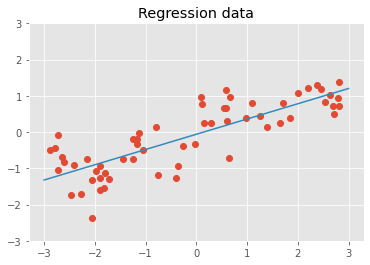

In [24]:
# %load ml02_plot_regression_data.py
import numpy as np
import matplotlib.pyplot as pl
pl.style.use('ggplot')
import data.gen_data as gd
from sklearn.linear_model import LinearRegression


X,y = gd.make_wave(n_samples=60)
lr  = LinearRegression().fit(X,y)
xx  = np.linspace(-3,3).reshape(-1,1)
yy  = lr.predict(xx)


pl.plot(X,y, 'o')
pl.plot(xx,yy)
pl.title('Regression data')
pl.ylim([-3,3])
pl.savefig('fig/02_regression_data.png')
pl.show()


In [28]:
# %load ml02_ols.py
import data.gen_data as gd
X,y = gd.make_wave(n_samples=60)

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import LinearRegression
lr           = LinearRegression()

lr.fit(X_train, y_train)
prediction   = lr.predict(X_test)
train_score  = lr.score( X_train, y_train) # 0.67008903150757559 
test_score   = lr.score( X_test,  y_test ) # 0.65933685968637012
print( lr.coef_ )                          # [ 0.39390555]
print( lr.intercept_ )                     # -0.0318043430268
print(train_score, test_score)

print(X.shape)


[0.39390555]
-0.031804343026759746
0.6700890315075756 0.65933685968637
(60, 1)


In [30]:
# %load ml02_ols_boston.py
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

X,y = gd.load_extended_boston()
print(X.shape, y.shape)              # (506, 104) (506,)

X_train, X_test, y_train, y_test = split(X,y, random_state=42)
lr  = LinearRegression().fit(X_train, y_train)

print( lr.score( X_train, y_train) ) # 0.944773345807
print( lr.score( X_test,  y_test ) ) # 0.791206227292


(506, 104) (506,)
0.9448313975211594
0.7758378393351691


In [35]:
# %load ml02_ridge.py
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print( ridge.score( X_train, y_train) ) # 0.870375195897
print( ridge.score( X_test,  y_test ) ) # 0.814099803185


0.8700969775259919
0.8145421818415556


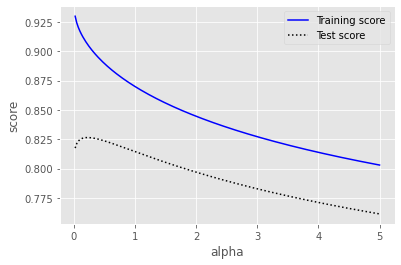

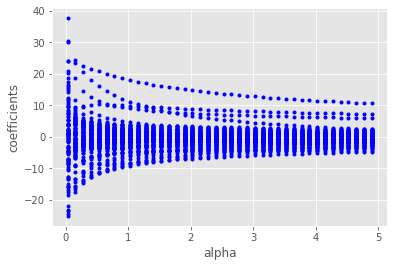

In [37]:
# %load ml02_ridge_alpha.py
import numpy as np
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Ridge

alphas      = np.linspace(0.025,5, 200)
train_score = [] 
test_score  = [] 
coefs       = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    train_score.append( ridge.score( X_train, y_train) )
    test_score.append ( ridge.score( X_test,  y_test ) )
    coefs.append(ridge.coef_)

import matplotlib.pyplot as pl
pl.style.use('ggplot')
pl.figure(1)
pl.plot( alphas, train_score, 'b-')
pl.plot( alphas, test_score,  'k:')
pl.legend(['Training score', 'Test score'])
pl.xlabel('alpha')
pl.ylabel('score')
pl.savefig('fig/02_ridge_alpha.png')

pl.figure(2)
for a,c in zip(alphas[::5], coefs[::5]):
    pl.plot(a*np.ones_like(c), c, 'b.')
pl.xlabel('alpha')
pl.ylabel('coefficients')
pl.savefig('fig/02_ridge_alpha_2.png')
pl.show()


In [39]:
# %load ml02_lasso.py
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Lasso
lasso      = Lasso()
lasso.fit(X_train, y_train)

prediction = lasso.predict(X_test)
print( lasso.score( X_train, y_train) ) # 0.267837783695
print( lasso.score( X_test,  y_test ) ) # 0.259923211834


0.26783778369518485
0.2599232118344591


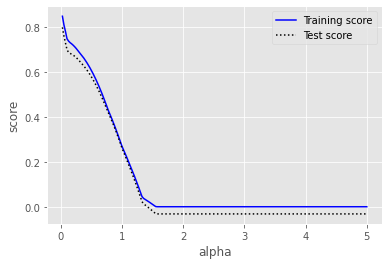

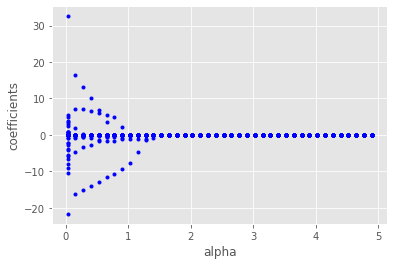

In [41]:
# %load ml02_lasso_alpha.py
import numpy as np
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Lasso

alphas      = np.linspace(0.025,5, 200)
train_score = [] 
test_score  = [] 
coefs       = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    train_score.append( lasso.score( X_train, y_train) )
    test_score.append ( lasso.score( X_test,  y_test ) )
    coefs.append(lasso.coef_)

import matplotlib.pyplot as pl
pl.style.use('ggplot')
pl.figure(1)
pl.plot( alphas, train_score, 'b-')
pl.plot( alphas, test_score,  'k:')
pl.legend(['Training score', 'Test score'])
pl.xlabel('alpha')
pl.ylabel('score')
pl.savefig('fig/02_lasso_alpha_1.png')

pl.figure(2)
for a,c in zip(alphas[::5], coefs[::5]):
    pl.plot(a*np.ones_like(c), c, 'b.')
pl.xlabel('alpha')
pl.ylabel('coefficients')
pl.savefig('fig/02_lasso_alpha_2.png')
pl.show()


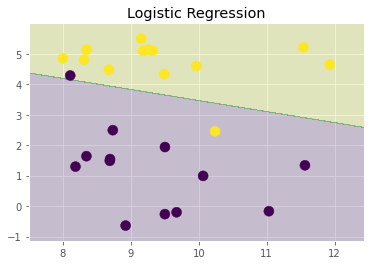

In [43]:
# %load ml02_logistic.py
import numpy as np
import matplotlib.pyplot as pl
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

def plot_boundary(classifier, X, ax):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=100, cmap=pl.get_cmap('viridis'))

X,y = gd.make_binary()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train, y_train)

fig, axes = pl.subplots(1,1)
plot_boundary( logistic, X, axes )
pl.title('Logistic Regression')
pl.savefig('fig/02_logistic.png')
pl.show()


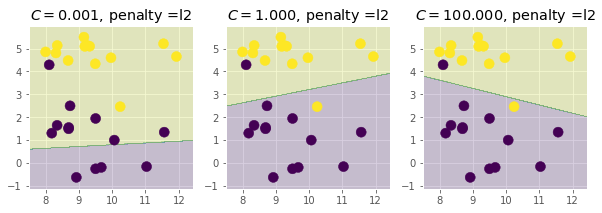

C:\Users\wooihaw\Anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


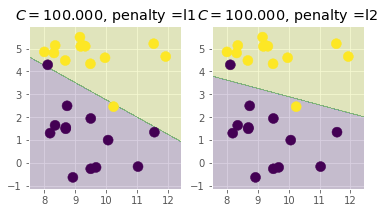

In [45]:
# %load ml02_logistic_C.py
import numpy as np
import matplotlib.pyplot as pl
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression

def plot_boundary(classifier, X, ax):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=100, cmap=pl.get_cmap('viridis'))

X,y = gd.make_binary()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

fig, axes = pl.subplots(1,3, figsize=(10,3))
for C, ax in zip( [0.001, 1.0, 100], axes):
    classifier = LogisticRegression(solver='liblinear', C=C).fit(X,y)
    plot_boundary(classifier, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C,'l2'))
    
#pl.savefig('fig/02_logistic_C.png')
pl.show()

fig, axes = pl.subplots(1,2, figsize=(6,3))
for p, ax in zip( ['l1', 'l2'], axes):
    classifier = LogisticRegression(solver='liblinear', C=100.0, penalty=p).fit(X,y)
    plot_boundary(classifier, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C,p))
    
#pl.savefig('fig/02_logistic_penalty.png')
pl.show()


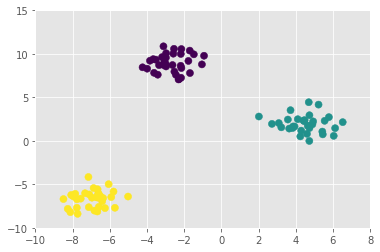

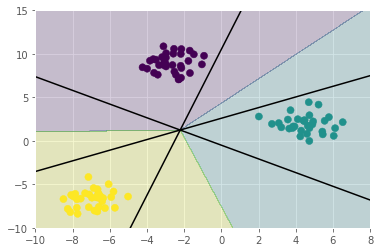

In [47]:
# %load ml02_multiclass.py
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_blobs

X, y = make_blobs( random_state=42)
pl.scatter(X[:,0], X[:,1], c=y, s=50)
pl.ylim([-10,15])
pl.xlim([-10, 8])
pl.savefig('fig/02_multiclass.png')
pl.show()


from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)


def plot_boundary(classifier, X, ax):
    x_min, x_max = -10, 8
    y_min, y_max = -10, 15
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=50, cmap=pl.get_cmap('viridis'))

x = np.linspace(-10,8)
fig, ax = pl.subplots(1,1)
plot_boundary(model, X, ax)
for coef, intercept,c in zip(model.coef_, model.intercept_, ['k']*3):
    ax.plot(x, -(x*coef[0] + intercept)/coef[1], c)
pl.savefig('fig/02_multiclass_boundary.png')
pl.show()


In [49]:
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas import read_csv

df = read_csv('data/genders_heights_weights.csv')
df

,Gender,Height,Weight
0,Male,187.6,109.7
1,Male,174.7,73.6
2,Male,188.2,96.5
3,Male,182.2,99.8
4,Male,177.5,93.6
...,...,...,...
9995,Female,168.1,62.0
9996,Female,170.4,77.5
9997,Female,162.2,58.3
9998,Female,175.3,74.3


In [51]:
X = df.values[:, 1:]
X

array([[187.6, 109.7],
       [174.7, 73.6],
       [188.2, 96.5],
       ...,
       [162.2, 58.3],
       [175.3, 74.3],
       [157.3, 51.6]], dtype=object)

In [52]:
y = df.values[:, 0]
y

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [53]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier().fit(X_train, y_train)
lgr = LogisticRegression().fit(X_train, y_train)

print(f'{knn.score(X_test, y_test)}')
print(f'{lgr.score(X_test, y_test)}')

0.913
0.9226666666666666


In [62]:
try:
    h = float(input('Enter height in cm: '))
    w = float(input('Enter weight in kg: '))
except ValueError:
    print('Not valid value')
else:
    print(f'knn prediction: {knn.predict([[h, w]])}')
    print(f'lgr prediction: {lgr.predict([[h, w]])}')

Enter height in cm: abc
Not valid value
